# CIFAR10 Example

In [5]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import znrnd as rnd

import tensorflow_datasets as tfds

import numpy as np
from flax import linen as nn
import optax
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import jax
print(jax.default_backend())

cpu


In [6]:
data_generator = rnd.data.CIFAR10Generator()

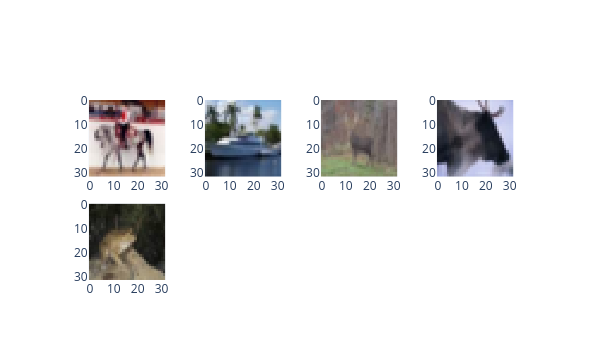

In [11]:
data_generator.plot_image(indices=[0, 1, 2, 3, 4])

In [12]:
class ProductionModule(nn.Module):
    """
    Simple CNN module.
    """

    @nn.compact
    def __call__(self, x):
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nn.Dense(features=300)(x)
        x = nn.relu(x)
        x = nn.Dense(10)(x)

        return x

In [13]:
production_model = rnd.models.FlaxModel(
            flax_module=ProductionModule(),
            optimizer=optax.adam(learning_rate=0.01),
            input_shape=(1, 32, 32, 3),
        )

training_strategy = rnd.training_strategies.SimpleTraining(
    model=production_model, 
    loss_fn=rnd.loss_functions.CrossEntropyLoss(),
    accuracy_fn=rnd.accuracy_functions.LabelAccuracy(),
)

In [14]:
batch_wise_training_metrics = training_strategy.train_model(
    train_ds={"inputs": data_generator.train_ds["inputs"], "targets": data_generator.train_ds["targets"]},
    test_ds={"inputs": data_generator.test_ds["inputs"], "targets": data_generator.test_ds["targets"]},
    batch_size=100,
)

Epoch: 50: 100%|██████████████████████████████████| 50/50 [00:58<00:00,  1.17s/batch, accuracy=0.36]


## Random Data Selection

In [15]:
class RNDModule(nn.Module):
    """
    Simple CNN module.
    """
    
    @nn.compact
    def __call__(self, x):
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = nn.Conv(features=128, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.max_pool(x, window_shape=(3, 3), strides=(2, 2))
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nn.Dense(features=300)(x)

        return x

In [16]:
target = rnd.models.FlaxModel(
            flax_module=RNDModule(),
            optimizer=optax.adam(learning_rate=0.01),
            input_shape=(1, 32, 32, 3),
        )
predictor = rnd.models.FlaxModel(
            flax_module=RNDModule(),
            optimizer=optax.adam(learning_rate=0.01),
            input_shape=(1, 32, 32, 3),
        )

In [17]:
rng_agent = rnd.agents.RandomAgent(data_generator=data_generator)

In [18]:
ds = rng_agent.build_dataset(300)

In [19]:
train_ds = {
    "inputs": np.take(data_generator.train_ds["inputs"], rng_agent.target_indices, axis=0),
    "targets": np.take(data_generator.train_ds["targets"], rng_agent.target_indices, axis=0)
}

In [20]:
training_strategy = rnd.training_strategies.SimpleTraining(
    model=production_model, 
    loss_fn=rnd.loss_functions.MeanPowerLoss(order=2),
    accuracy_fn=rnd.accuracy_functions.LabelAccuracy(),
)
training_strategy.train_model(
    train_ds=train_ds, 
    test_ds=data_generator.test_ds,
    epochs=100,
    batch_size=50
)

Epoch: 100: 100%|██████████████████████████████| 100/100 [01:19<00:00,  1.26batch/s, accuracy=0.114]


{'train_losses': [53.51704,
  0.1468521,
  0.120043196,
  0.11448621,
  0.11147786,
  0.107873656,
  0.10401452,
  0.10074242,
  0.09781245,
  0.09566947,
  0.09401538,
  0.09283185,
  0.09197935,
  0.09138619,
  0.09094113,
  0.09062973,
  0.09036243,
  0.09017837,
  0.09006222,
  0.08996925,
  0.089898445,
  0.089839004,
  0.08980144,
  0.08977529,
  0.08975116,
  0.089740135,
  0.08972591,
  0.089713305,
  0.0897157,
  0.0897036,
  0.08969953,
  0.08969852,
  0.08970515,
  0.08970067,
  0.08969703,
  0.08970004,
  0.08969397,
  0.0896959,
  0.089699596,
  0.08969694,
  0.08970171,
  0.08971124,
  0.08969754,
  0.08968997,
  0.08970686,
  0.08969853,
  0.08969847,
  0.08970236,
  0.08969455,
  0.08971525,
  0.089698814,
  0.08969384,
  0.08969737,
  0.08970537,
  0.089695536,
  0.08970023,
  0.089697205,
  0.089702934,
  0.08970343,
  0.08969913,
  0.08970371,
  0.08970729,
  0.08969461,
  0.08969305,
  0.08970785,
  0.089706145,
  0.08969615,
  0.0896993,
  0.089697696,
  0.0896933,